#### Negatice Reviews

In [1]:
# negative reviews
with open('neg.txt.neg') as f:
    lines = f.read()

In [2]:
type(lines)

str

In [4]:
# Spliting text
neg_review = lines.split('\n')
neg_review

['simplistic , silly and tedious . ',
 "it's so laddish and juvenile , only teenage boys could possibly find it funny . ",
 'exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . ',
 '[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . ',
 'a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . ',
 "the story is also as unoriginal as they come , already having been recycled more times than i'd care to count . ",
 "about the only thing to give the movie points for is bravado -- to take an entirely stale concept and push it through the audience's meat grinder one more time . ",
 'not so much farcical as sour . ',
 'unfortunately the story and the actors are served with a hack script . ',
 'all the more disquieting for its relatively gore-free allusions to the serial murders , but it

In [5]:
type(neg_review)

list

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# convert into DataFrame
neg_df = pd.DataFrame(neg_review)

In [8]:
neg_df.head()

0
0                  simplistic , silly and tedious . 
1  it's so laddish and juvenile , only teenage bo...
2  exploitative and largely devoid of the depth o...
3  [garbus] discards the potential for pathologic...
4  a visually flashy but narratively opaque and e...

In [9]:
# Renaming column name
neg_df.rename(columns={0:'text'}, inplace=True)

In [10]:
neg_df.head(2)

text
0                  simplistic , silly and tedious . 
1  it's so laddish and juvenile , only teenage bo...

In [11]:
# Add new column
neg_df['label'] = 0

In [12]:
neg_df.head(2)

text  label
0                  simplistic , silly and tedious .       0
1  it's so laddish and juvenile , only teenage bo...      0

#### Positive Review

In [13]:
with open('pos.txt.pos') as f:
    lines = f.read()

In [15]:
type(lines)

str

In [16]:
pos_review = lines.split('\n')
pos_review

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . ',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . ',
 'effective but too-tepid biopic',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start . ',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . ",
 'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game . ',
 'offers that rare combination of entertainment and education . ',
 'perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions . ',
 "steers 

In [17]:
type(pos_review)

list

In [18]:
pos_df = pd.DataFrame(pos_review)

In [19]:
pos_df.head()

0
0  the rock is destined to be the 21st century's ...
1  the gorgeously elaborate continuation of " the...
2                     effective but too-tepid biopic
3  if you sometimes like to go to the movies to h...
4  emerges as something rare , an issue movie tha...

In [20]:
pos_df.rename(columns={0:'text'}, inplace=True)

In [21]:
pos_df.head()

text
0  the rock is destined to be the 21st century's ...
1  the gorgeously elaborate continuation of " the...
2                     effective but too-tepid biopic
3  if you sometimes like to go to the movies to h...
4  emerges as something rare , an issue movie tha...

In [22]:
pos_df['label'] = 1

In [23]:
pos_df.head(2)

text  label
0  the rock is destined to be the 21st century's ...      1
1  the gorgeously elaborate continuation of " the...      1

In [24]:
pos_df.shape

(5332, 2)

#### concat neg_df and pos_df 

In [25]:
new_df = pd.concat([neg_df, pos_df], ignore_index=True)

In [26]:
new_df.head()

text  label
0                  simplistic , silly and tedious .       0
1  it's so laddish and juvenile , only teenage bo...      0
2  exploitative and largely devoid of the depth o...      0
3  [garbus] discards the potential for pathologic...      0
4  a visually flashy but narratively opaque and e...      0

In [27]:
new_df.shape

(10664, 2)

#### specifying feature and target

In [28]:
x = new_df['text']
y = new_df['label']

In [29]:
x.head(2)

0                    simplistic , silly and tedious . 
1    it's so laddish and juvenile , only teenage bo...
Name: text, dtype: object

In [30]:
y.head(2)

0    0
1    0
Name: label, dtype: int64

#### Train, Test and Split Data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [33]:
x_train.shape

(8531,)

In [34]:
x_test.shape

(2133,)

#### TfidfVeactorizer (Term Frequency-Inverse Document Frequency Vectorzer)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vect1 = TfidfVectorizer()

In [37]:
x_train_vectorised = vect1.fit_transform(x_train)
x_test_vectorised = vect1.transform(x_test)

#### Build Model Using Logistic Regression Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(x_train_vectorised, y_train)

LogisticRegression()

In [40]:
# predicting
y_pred = model.predict(x_test_vectorised)

#### classification_report metrics and confusion_matrix metrics

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1072
           1       0.77      0.78      0.77      1061

    accuracy                           0.77      2133
   macro avg       0.77      0.77      0.77      2133
weighted avg       0.77      0.77      0.77      2133



[[825 247]
 [234 827]]


<AxesSubplot:>

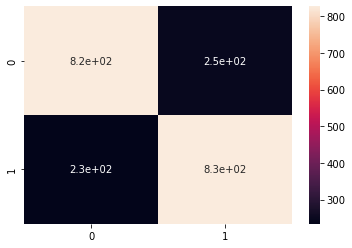

In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [44]:
y_train_pred = model.predict(x_train_vectorised)

In [45]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4260
           1       0.90      0.88      0.89      4271

    accuracy                           0.89      8531
   macro avg       0.89      0.89      0.89      8531
weighted avg       0.89      0.89      0.89      8531



In [46]:
x_test[:5]

5844    sure , it's more of the same , but as the film...
8515    some people want the ol' ball-and-chain and th...
5609    there are a few stabs at absurdist comedy . . ...
5686    as a randy film about sexy people in gorgeous ...
9619    nothing short of wonderful with its ten-year-o...
Name: text, dtype: object

In [47]:
y_test[:5]

5844    1
8515    1
5609    1
5686    1
9619    1
Name: label, dtype: int64

In [48]:
y_pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [49]:
x_test[9619]

'nothing short of wonderful with its ten-year-old female protagonist and its steadfast refusal to set up a dualistic battle between good and evil . '

In [50]:
a = ['nothing short of wonderful with its ten-year-old female protagonist and its steadfast refusal to set up a dualistic battle between good and evil . ']

In [51]:
type(a)

list

In [52]:
a_trasnformed = vect1.transform(a)

In [53]:
model.predict(a_trasnformed)

array([1], dtype=int64)

In [54]:
b = ['good']

In [55]:
b_transformed = vect1.transform(b)

In [56]:
model.predict(b_transformed)

array([1], dtype=int64)

In [58]:
from sklearn.pipeline import Pipeline

#### Parameter Tuning

In [59]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer(max_df= 0.5, min_df= 7, stop_words= ['a','and','the'], sublinear_tf=True)),
    ('logistic regression', LogisticRegression())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

y_train_pred = clf.predict(x_train)

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1072
           1       0.76      0.75      0.76      1061

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4260
           1       0.85      0.84      0.84      4271

    accuracy                           0.84      8531
   macro avg       0.84      0.84      0.84      8531
weighted avg       0.84      0.84      0.84      8531



In [60]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer(max_df= 0.5, min_df= 7, stop_words= 'english', sublinear_tf=True)),
    ('logistic regression', LogisticRegression())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

y_train_pred = clf.predict(x_train)

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1072
           1       0.75      0.75      0.75      1061

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4260
           1       0.83      0.83      0.83      4271

    accuracy                           0.83      8531
   macro avg       0.83      0.83      0.83      8531
weighted avg       0.83      0.83      0.83      8531



In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

y_train_pred = clf.predict(x_train)

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1072
           1       0.79      0.77      0.78      1061

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4260
           1       0.94      0.92      0.93      4271

    accuracy                           0.93      8531
   macro avg       0.93      0.93      0.93      8531
weighted avg       0.93      0.93      0.93      8531



In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('decision tree', DecisionTreeClassifier())
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_train_pred = clf.predict(x_train)

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1072
           1       0.58      0.61      0.59      1061

    accuracy                           0.59      2133
   macro avg       0.59      0.59      0.59      2133
weighted avg       0.59      0.59      0.59      2133

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4260
           1       1.00      1.00      1.00      4271

    accuracy                           1.00      8531
   macro avg       1.00      1.00      1.00      8531
weighted avg       1.00      1.00      1.00      8531



In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('random forest', RandomForestClassifier())
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_train_pred = clf.predict(x_train)

print(classification_report(y_test, y_pred))

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1072
           1       0.71      0.69      0.70      1061

    accuracy                           0.70      2133
   macro avg       0.70      0.70      0.70      2133
weighted avg       0.70      0.70      0.70      2133

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4260
           1       1.00      1.00      1.00      4271

    accuracy                           1.00      8531
   macro avg       1.00      1.00      1.00      8531
weighted avg       1.00      1.00      1.00      8531

